In [110]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [111]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [126]:
X_train[:10]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [112]:
len(X_train)

60000

In [113]:
len(X_test)

10000

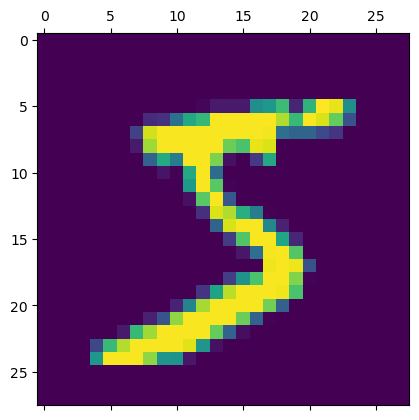

In [114]:
plt.matshow(X_train[0])

Grayscaling the images

In [115]:
gray_scale=255
X_train=X_train.astype('float32')/gray_scale
X_test=X_test.astype('float32')/gray_scale


In [116]:
print('Feature matrix(X_train)',X_train.shape)
print('Target matrix(y_train)',y_train.shape)
print('Feature matrix(X_test)',X_test.shape)
print('Target matrix(y_test)',y_test.shape)


Feature matrix(X_train) (60000, 28, 28)
Target matrix(y_train) (60000,)
Feature matrix(X_test) (10000, 28, 28)
Target matrix(y_test) (10000,)


#Visualizing 100 images 

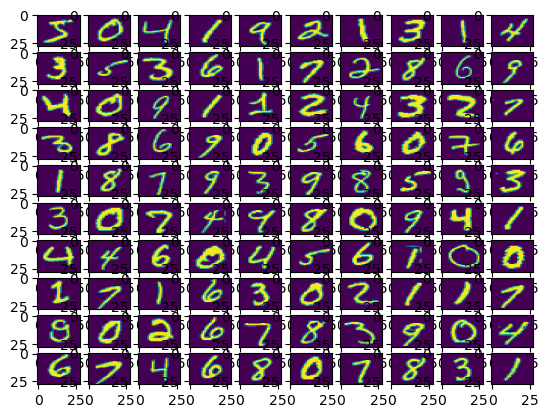

In [117]:
fig,ax=plt.subplots(10,10)
k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X_train[k].reshape(28,28),aspect='auto')
        k+=1                
plt.show()

In [118]:
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
          
])

C:\Users\Hp\anaconda3\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [120]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by 10 degrees
    zoom_range=0.1,  # Zoom images
    width_shift_range=0.1,  # Shift horizontally
    height_shift_range=0.1  # Shift vertically
)

datagen.fit(X_train.reshape(-1, 28, 28, 1)) 

In [121]:
x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

x_train_new = x_train_new.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
model.fit(datagen.flow(x_train_new, y_train_new, batch_size=200), 
          validation_data=(x_val, y_val), 
          epochs=20)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 54s 206ms/step - accuracy: 0.4877 - loss: 1.5509 - val_accuracy: 0.9538 - val_loss: 0.1681
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 45s 183ms/step - accuracy: 0.9140 - loss: 0.2817 - val_accuracy: 0.9684 - val_loss: 0.1109
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.9412 - loss: 0.1862 - val_accuracy: 0.9713 - val_loss: 0.0964
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.9527 - loss: 0.1544 - val_accuracy: 0.9732 - val_loss: 0.0864
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.9564 - loss: 0.1378 - val_accuracy: 0.9709 - val_loss: 0.0944
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 161ms/step - accuracy: 0.9626 - loss: 0.1179 - val_accuracy: 0.9821 - val_loss: 0.0602
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 159ms/step - accuracy: 0.9664 - loss: 0.1063 - val_accuracy: 0.9827 - val_loss: 0.0546
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 163ms/step - accuracy: 0.9710 - loss: 0

In [125]:
if len(model.input_shape) == 4:  
    X_test = X_test.reshape(-1, 28, 28, 1)

result = model.evaluate(X_test, y_test, verbose=0)
print('Loss, Accuracy:', result)


Loss, Accuracy: [0.030780410394072533, 0.989799976348877]


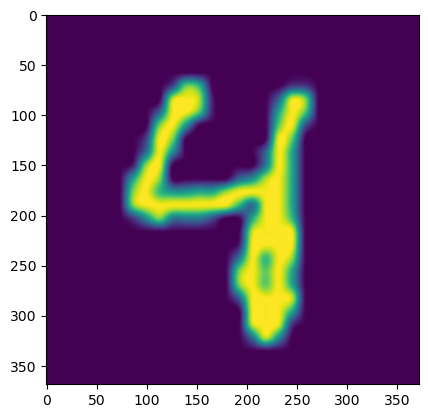

In [123]:
import cv2

img=cv2.imread('netimg4.ppm',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [124]:
img = cv2.resize(img, (28, 28))
img=img.astype('float32')/gray_scale

img=img.reshape(1,28,28,1)

pred=model.predict(img)
digit = np.argmax(pred)
print(digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
4
